# Bank data

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

## 1. Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## 2. Import the dataset

In [2]:
bank_data=pd.read_csv('bank-full.csv',delimiter=';')

In [3]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<center>This is how the data looks</center>

## 3. Description of Data Frame

In [4]:
# Only numerical columns will be listed.
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Listing columns into numerical and categorical

In [78]:
all_columns = bank_data.columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

- Let's check for the frequency of labels in our dataset.

In [6]:
bank_data.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [60]:
bank_data.y.value_counts()/bank_data.y.count()

no     0.883015
yes    0.116985
Name: y, dtype: float64

- This is a high class imbalance problem, with the number of `yes` as **5289** and `no` as **39922**. If we predict `no` for every case we will get the accuracy of our model as `accuracy = 5289/45211 * 100 = 88.3015 %`.
- For handeling this Class imbalance problem, Since we have enough data for our minority class, so we can to undersample our data. We will do it in Preprocessing.

## 5. Preprocessing

### Undersampling

In [61]:
import imblearn
imblearn.__version__

'0.7.0'

In [72]:
Under_Sampler = imblearn.under_sampling.RandomUnderSampler()
bank_sampled_X, bank_sampled_y = Under_Sampler.fit_resample(bank_data.iloc[:, :-1], bank_data.y)
# pd.DataFrame(bank_sampled, columns = bank)
bank_sampled = pd.concat([bank_sampled_X,bank_sampled_y], axis=1)
bank_sampled

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,38,admin.,married,secondary,no,755,yes,no,cellular,25,may,531,1,97,1,success,no
1,28,technician,single,secondary,no,1581,no,yes,cellular,7,jul,576,2,-1,0,unknown,no
2,42,blue-collar,married,secondary,no,3743,yes,no,unknown,14,may,136,1,-1,0,unknown,no
3,47,blue-collar,married,primary,no,613,yes,no,cellular,29,jan,49,3,255,2,other,no
4,33,blue-collar,single,secondary,no,264,yes,no,cellular,17,apr,494,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10573,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
10574,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
10575,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
10576,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


In [73]:
bank_sampled.y.value_counts()

no     5289
yes    5289
Name: y, dtype: int64

- Now our data has 50-50 percent division of both the classes.

### Checking for null values

In [75]:
bank_sampled.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000
mean,41.333901,1563.808376,15.520987,379.467102,2.520703,52.245037,0.861410
std,11.997985,3261.359668,8.356842,348.959698,2.719219,109.270922,3.495169
min,18.000000,-3058.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,130.000000,8.000000,144.000000,1.000000,-1.000000,0.000000
50%,39.000000,556.500000,15.000000,261.000000,2.000000,-1.000000,0.000000
75%,49.000000,1765.750000,21.000000,507.000000,3.000000,63.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,46.000000,854.000000,275.000000


In [76]:
bank_sampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10578 entries, 0 to 10577
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        10578 non-null  int64 
 1   job        10578 non-null  object
 2   marital    10578 non-null  object
 3   education  10578 non-null  object
 4   default    10578 non-null  object
 5   balance    10578 non-null  int64 
 6   housing    10578 non-null  object
 7   loan       10578 non-null  object
 8   contact    10578 non-null  object
 9   day        10578 non-null  int64 
 10  month      10578 non-null  object
 11  duration   10578 non-null  int64 
 12  campaign   10578 non-null  int64 
 13  pdays      10578 non-null  int64 
 14  previous   10578 non-null  int64 
 15  poutcome   10578 non-null  object
 16  y          10578 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [74]:
bank_sampled.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

So no NaN values are found in this dataset. So we can say that there are no null values for the numerical columns/features but we cannot say this for Categorical columns. Let's check for categorical columns.

In [79]:
for column in categorical_columns:
    print('*'*20 + ' ' + column + ' ' + 20*'*')
    print(bank_sampled[column].value_counts())

******************** job ********************
management       2414
blue-collar      1932
technician       1668
admin.           1260
services          825
retired           753
self-employed     368
student           356
unemployed        349
entrepreneur      329
housemaid         263
unknown            61
Name: job, dtype: int64
******************** marital ********************
married     6041
single      3292
divorced    1245
Name: marital, dtype: int64
******************** education ********************
secondary    5209
tertiary     3483
primary      1422
unknown       464
Name: education, dtype: int64
******************** default ********************
no     10426
yes      152
Name: default, dtype: int64
******************** housing ********************
no     5572
yes    5006
Name: housing, dtype: int64
******************** loan ********************
no     9212
yes    1366
Name: loan, dtype: int64
******************** contact ********************
cellular     7685
unknown      

So there are:
- 61 unknown in `job`
- No unknown in `maritial`
- 464 unknown in `education`
- No unknown in `default`, but it is highley skwed.
- No unknown in `housing`
- No unknown in `loan`, but it is skwed
- 2156 unknown in `contact`
- No unknown in `month`
- 7835 unknown in `poutcome`

So, we need to focous on `job`, `education`, `contact` and `poutcome` for null values. We can remove the rows where `job` and `maritial` is unknown but we cannot do it for `contact` and `poutcome` because `contact` is unknown for lots of values and `poutcome` is unknown for almost all of the data. Hence we will not use `contact` and `poutcome` in our model.

`default` and `loan` are skwed so we will consider them after Exploratory Data Analysis.

## 4. Exploratory Data Analysis

### a. Histograms

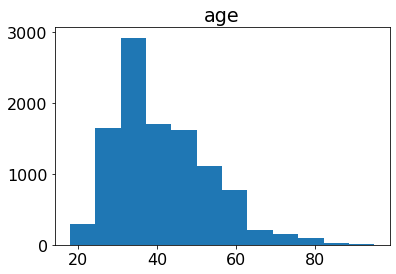

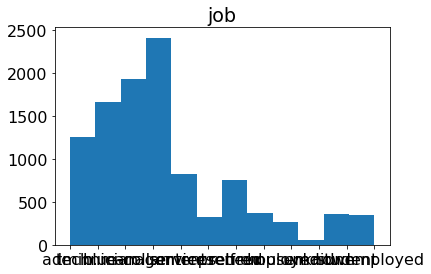

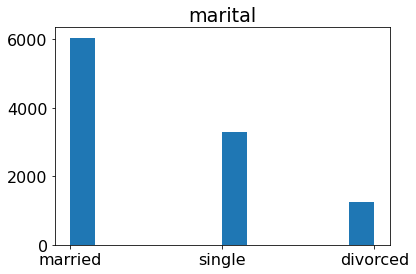

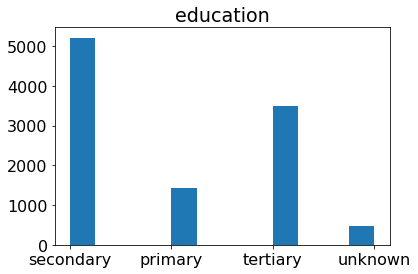

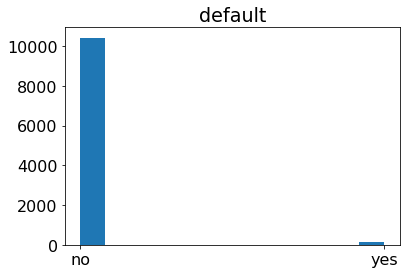

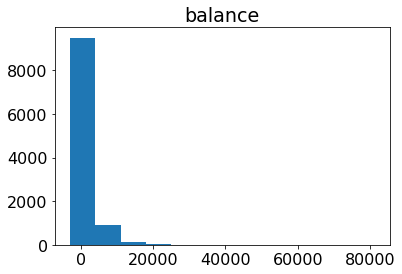

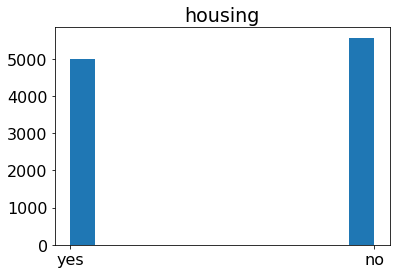

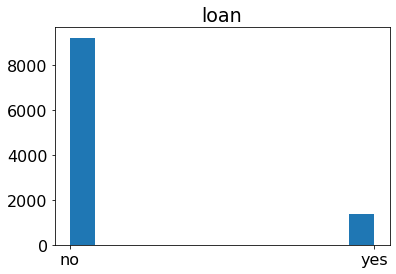

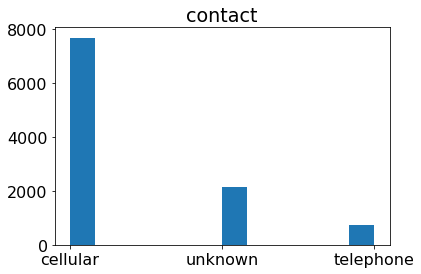

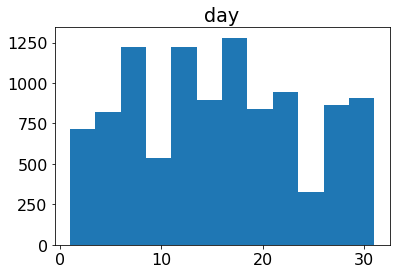

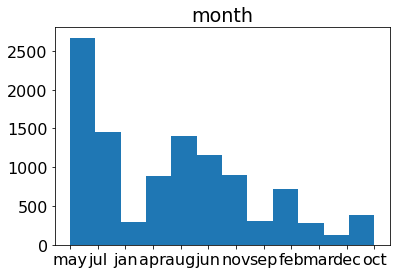

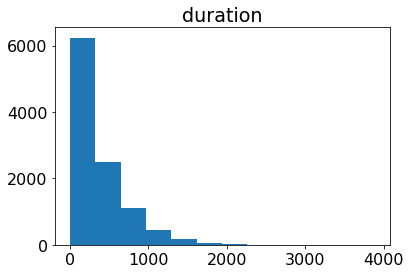

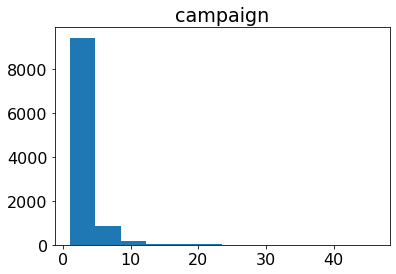

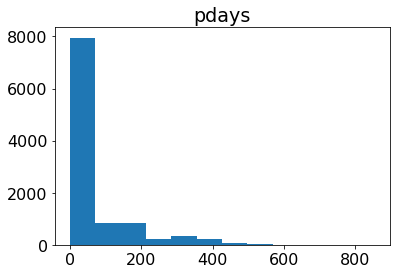

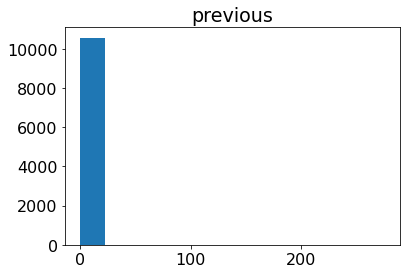

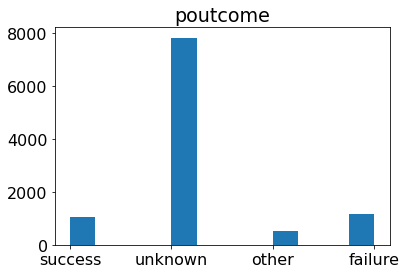

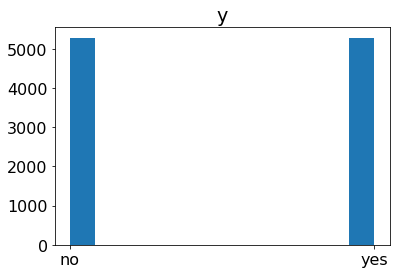

In [92]:
for column in all_columns:
    plt.figure()
    plt.hist(bank_sampled[column], bins=12)
    plt.title(column)
plt.show()

### b. Boxplot for Numerical Columns

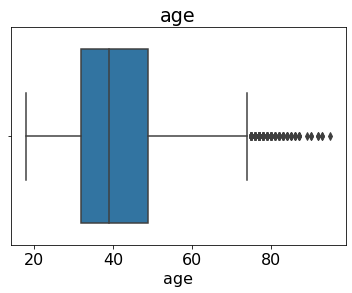

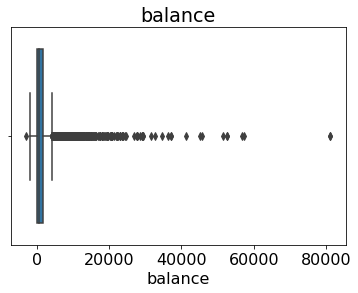

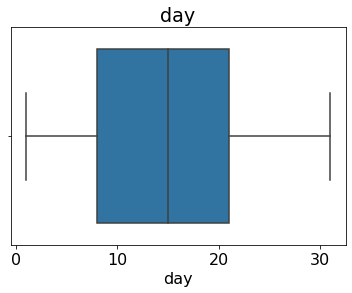

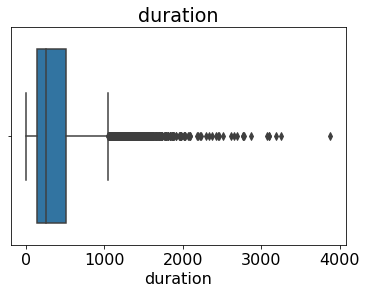

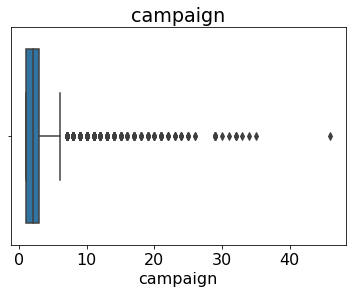

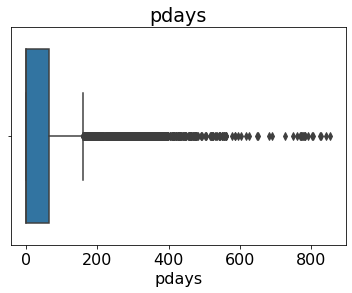

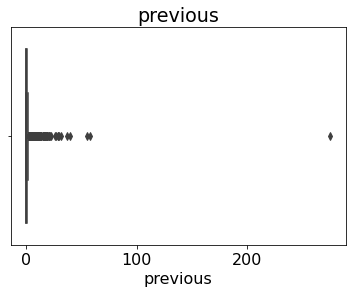

In [93]:
for column in numerical_columns:
    plt.figure()
    sns.boxplot(bank_sampled[column])
    plt.title(column)
plt.show()

In [ ]:
# data_frame.default.value_counts()

In [ ]:
# data_frame.job.value_counts()

### c. Bar plot for categorical columns

<AxesSubplot:xlabel='job', ylabel='count'>

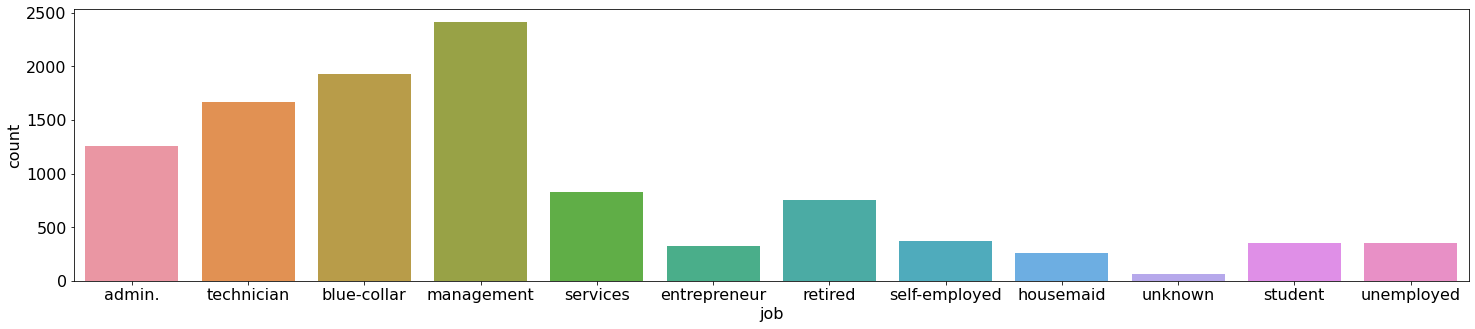

In [97]:
# Bar plot for 'job' column
plt.figure(figsize=[25,5])
# plt.bar(x = bank_data.job.value_counts().index, height=bank_data.job.value_counts())
sns.countplot(bank_sampled.job)

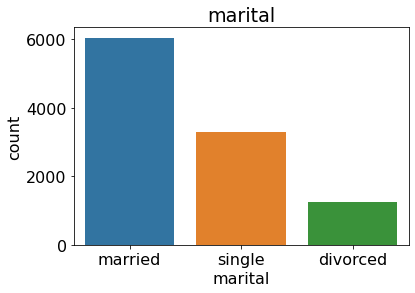

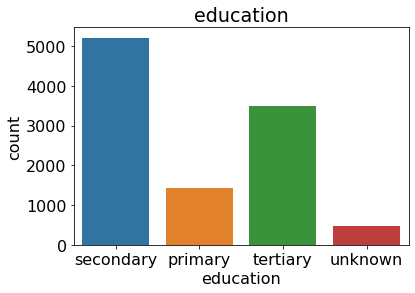

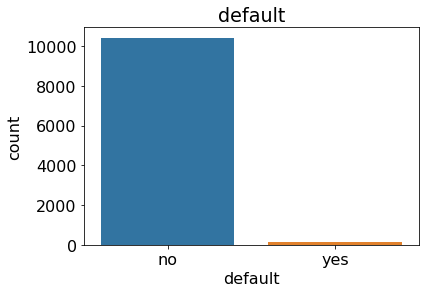

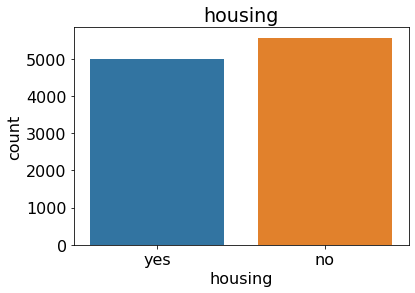

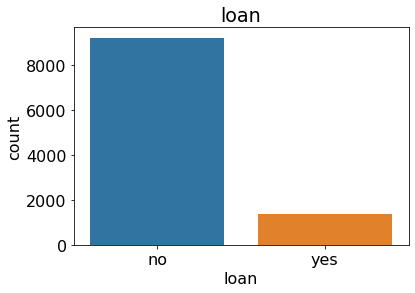

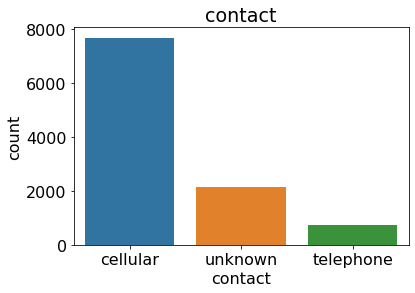

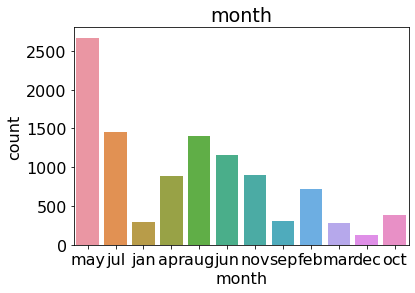

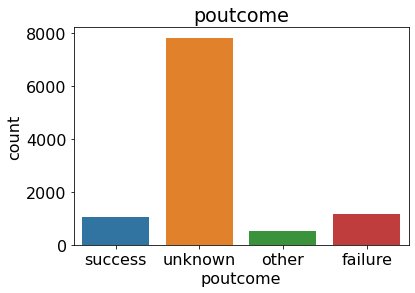

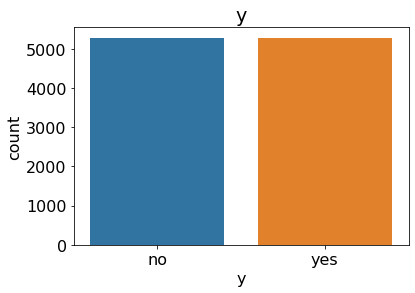

In [98]:
# Bar plot for all columns other than job
for column in categorical_columns[1:]:
    plt.figure()
#     plt.bar(x = bank_data[column].value_counts().index, height=bank_data[column].value_counts())
    sns.countplot(x = bank_sampled[column])
    plt.title(column)
plt.show()

## Bivariate Analysis

### a. Boxplot for numerical columns

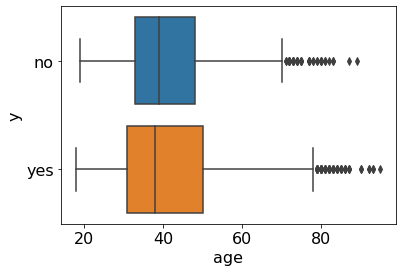

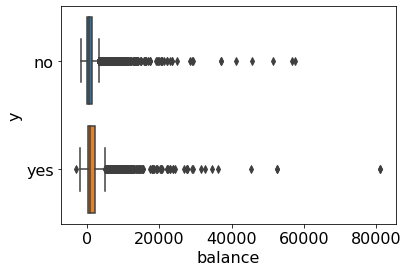

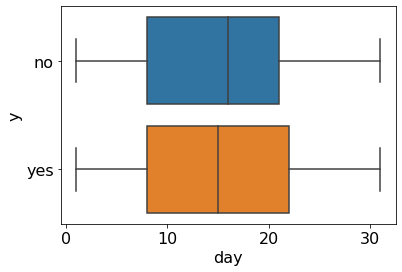

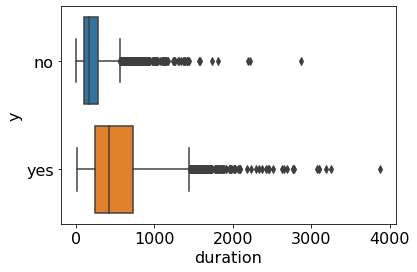

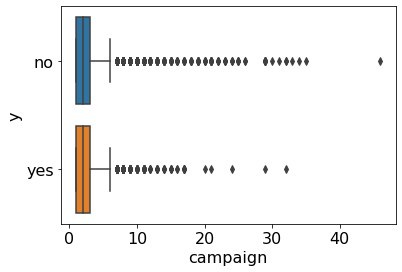

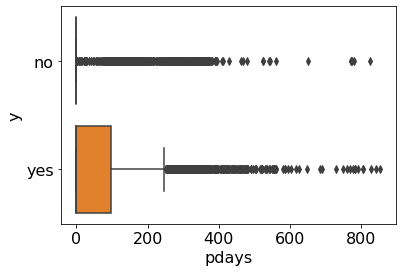

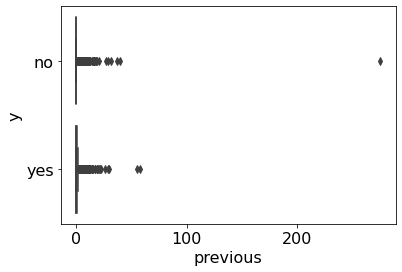

In [99]:
for column in numerical_columns:
    plt.figure()
    sns.boxplot(x = bank_sampled[column], y = bank_sampled.y)
#     plt.title(cols)
plt.show()

### b. Barplot for numerical columns

[]

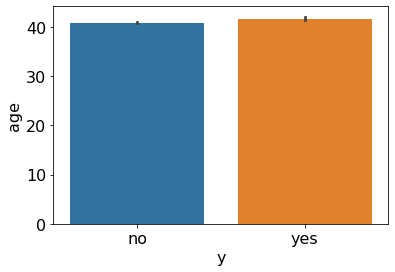

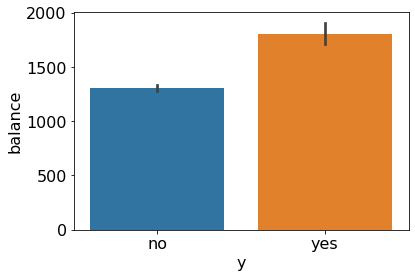

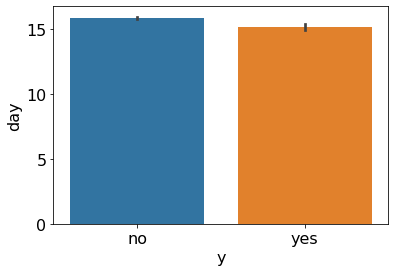

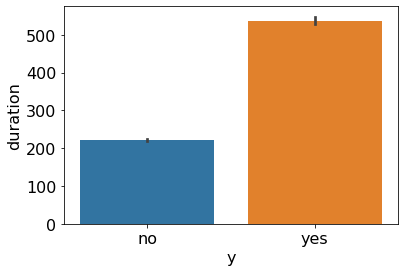

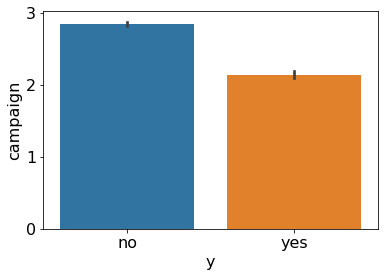

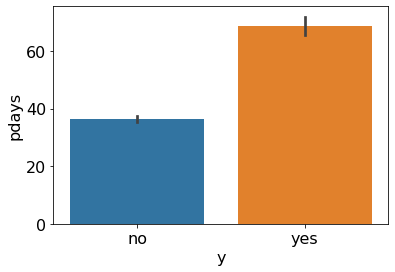

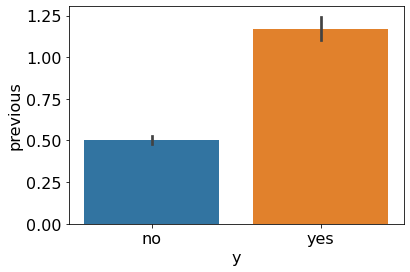

In [100]:
for column in numerical_columns:
    plt.figure()
    sns.barplot(x = 'y', y = column, data=bank_data)
plt.plot()

In [ ]:
# for column in numerical_columns:
#     plt.figure(figsize=[1,5])
#     sns.scatterplot(y = bank_data[column], x = bank_data.y)
# #     plt.title(cols)
# plt.show()

### Countplot for Categorical Columns

<AxesSubplot:xlabel='job', ylabel='count'>

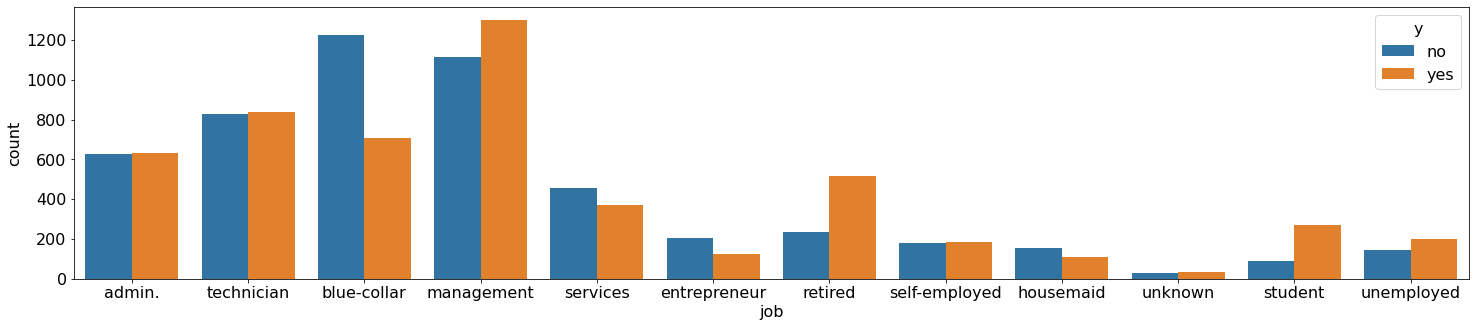

In [101]:
plt.figure(figsize=[25,5])
sns.countplot(x = 'job', hue = 'y' ,data=bank_sampled)

[]

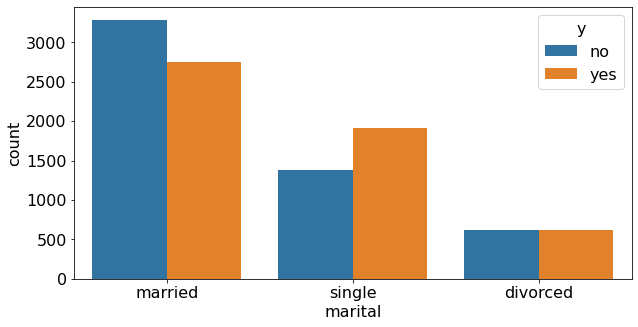

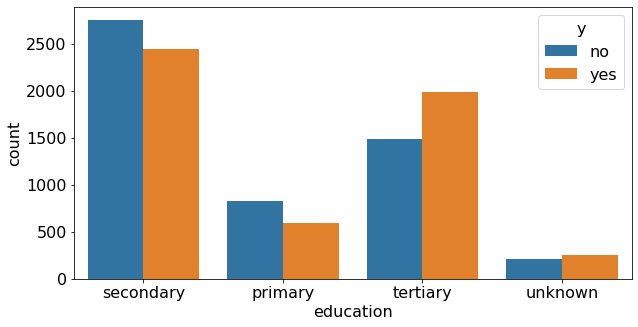

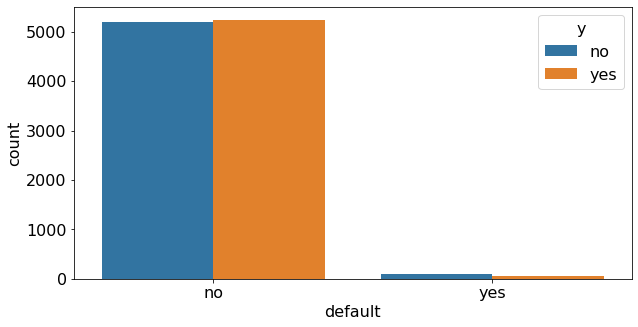

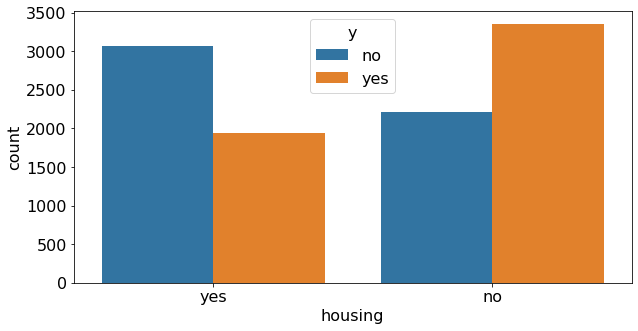

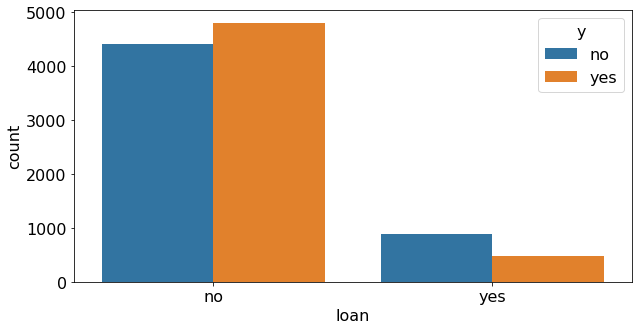

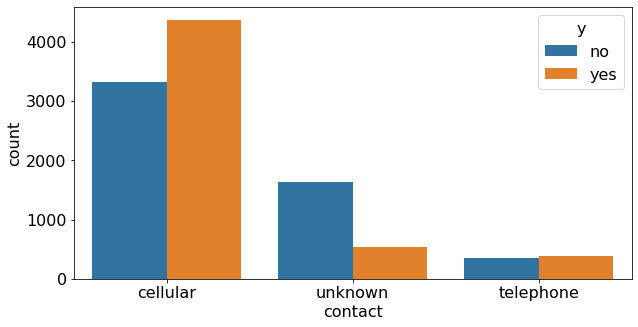

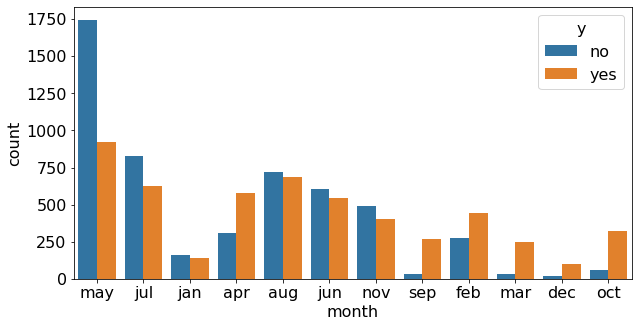

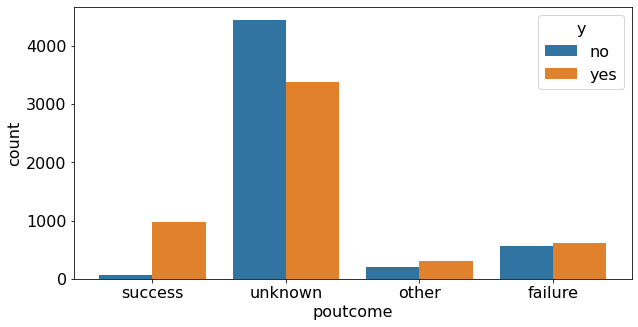

In [103]:
for column in categorical_columns[1:-1]:
    plt.figure(figsize = [10,5])
    sns.countplot(x = column, hue = 'y', data=bank_sampled)
plt.plot()

Here, we can see that the **unknown** values of `job` and `education` does not contain much of data and it does not effect a particular class too much. So this can be removed.

## 5. Further Preprocessing

As decided earlier we have to remove the columns `contact` and `poutcome` and the **unknown** values from `job` and `education`.

### Remove Unknown values

In [104]:
modified_bank_data = bank_sampled.drop(bank_sampled[bank_sampled.job=='unknown'].index)
modified_bank_data = modified_bank_data.drop(modified_bank_data[modified_bank_data.education=='unknown'].index)
modified_bank_data.reset_index(drop=True, inplace=True)
modified_bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,38,admin.,married,secondary,no,755,yes,no,cellular,25,may,531,1,97,1,success,no
1,28,technician,single,secondary,no,1581,no,yes,cellular,7,jul,576,2,-1,0,unknown,no
2,42,blue-collar,married,secondary,no,3743,yes,no,unknown,14,may,136,1,-1,0,unknown,no
3,47,blue-collar,married,primary,no,613,yes,no,cellular,29,jan,49,3,255,2,other,no
4,33,blue-collar,single,secondary,no,264,yes,no,cellular,17,apr,494,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10076,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
10077,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
10078,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
10079,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


### Drop Columns `contact` and `poutcome`

In [105]:
modified_bank_data.drop(columns=['contact', 'poutcome'], inplace=True)
modified_bank_data

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,38,admin.,married,secondary,no,755,yes,no,25,may,531,1,97,1,no
1,28,technician,single,secondary,no,1581,no,yes,7,jul,576,2,-1,0,no
2,42,blue-collar,married,secondary,no,3743,yes,no,14,may,136,1,-1,0,no
3,47,blue-collar,married,primary,no,613,yes,no,29,jan,49,3,255,2,no
4,33,blue-collar,single,secondary,no,264,yes,no,17,apr,494,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10076,73,retired,married,secondary,no,2850,no,no,17,nov,300,1,40,8,yes
10077,25,technician,single,secondary,no,505,no,yes,17,nov,386,2,-1,0,yes
10078,51,technician,married,tertiary,no,825,no,no,17,nov,977,3,-1,0,yes
10079,71,retired,divorced,primary,no,1729,no,no,17,nov,456,2,-1,0,yes


### Converting Categorical Columns into Numerical Columns

- Let's first convert all categorical columns into numerical columns using LabelEncoder. We will need to store these categorical columns in a dictionary so that we can later add this to our data frame replacing the categorical ones with these numerical ones.

In [106]:
categorical_columns.remove('contact')
categorical_columns.remove('poutcome')
categorical_columns

['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'y']

In [107]:
categorical_columns_dict = {}
for column in categorical_columns:
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    categorical_columns_dict[column] = le.fit_transform(modified_bank_data[column])

In [108]:
categorical_columns_dict

{'job': array([0, 9, 1, ..., 9, 5, 5]),
 'marital': array([1, 2, 1, ..., 1, 0, 1]),
 'education': array([1, 1, 1, ..., 2, 0, 1]),
 'default': array([0, 0, 0, ..., 0, 0, 0]),
 'housing': array([1, 0, 1, ..., 0, 0, 0]),
 'loan': array([0, 1, 0, ..., 0, 0, 0]),
 'month': array([8, 5, 8, ..., 9, 9, 9]),
 'y': array([0, 0, 0, ..., 1, 1, 1])}

In [109]:
num_data_frame = pd.DataFrame.from_dict(categorical_columns_dict)
num_data_frame

,job,marital,education,default,housing,loan,month,y
0,0,1,1,0,1,0,8,0
1,9,2,1,0,0,1,5,0
2,1,1,1,0,1,0,8,0
3,1,1,0,0,1,0,4,0
4,1,2,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...
10076,5,1,1,0,0,0,9,1
10077,9,2,1,0,0,1,9,1
10078,9,1,2,0,0,0,9,1
10079,5,0,0,0,0,0,9,1


- Let's drop the categorical columns which we need to replace with the numerical one's

In [110]:
modified_bank_data = modified_bank_data.drop(categorical_columns, axis=1)
modified_bank_data.head()

,age,balance,day,duration,campaign,pdays,previous
0,38,755,25,531,1,97,1
1,28,1581,7,576,2,-1,0
2,42,3743,14,136,1,-1,0
3,47,613,29,49,3,255,2
4,33,264,17,494,1,-1,0


In [111]:
modified_bank_data = pd.concat([modified_bank_data, num_data_frame], axis=1)
modified_bank_data

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,month,y
0,38,755,25,531,1,97,1,0,1,1,0,1,0,8,0
1,28,1581,7,576,2,-1,0,9,2,1,0,0,1,5,0
2,42,3743,14,136,1,-1,0,1,1,1,0,1,0,8,0
3,47,613,29,49,3,255,2,1,1,0,0,1,0,4,0
4,33,264,17,494,1,-1,0,1,2,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10076,73,2850,17,300,1,40,8,5,1,1,0,0,0,9,1
10077,25,505,17,386,2,-1,0,9,2,1,0,0,1,9,1
10078,51,825,17,977,3,-1,0,9,1,2,0,0,0,9,1
10079,71,1729,17,456,2,-1,0,5,0,0,0,0,0,9,1


In [26]:
# modified_bank_data.loc[:, numerical_columns]

### Outliers

In [112]:
from scipy import stats
z = np.abs(stats.zscore(modified_bank_data.loc[:, numerical_columns]))
print(z)

[[0.26745335 0.24602056 1.13886938 ... 0.56296967 0.41235797 0.037688  ]
 [1.11006764 0.00669278 1.02057806 ... 0.19191395 0.48564824 0.24332734]
 [0.06959237 0.66815312 0.18079294 ... 0.56296967 0.48564824 0.24332734]
 ...
 [0.82794523 0.22460418 0.17911497 ... 0.17914177 0.48564824 0.24332734]
 [2.51317381 0.05197313 0.17911497 ... 0.19191395 0.48564824 0.24332734]
 [2.59743524 1.27148327 0.17911497 ... 0.9212532  1.20956756 0.59971869]]


In [113]:
np.array(np.where(z>3)).shape

(2, 858)

In [114]:
cleaned_bank_data = modified_bank_data[(z < 3).all(axis=1)]

In [115]:
cleaned_bank_data.reset_index(drop=True, inplace=True)
cleaned_bank_data

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,month,y
0,38,755,25,531,1,97,1,0,1,1,0,1,0,8,0
1,28,1581,7,576,2,-1,0,9,2,1,0,0,1,5,0
2,42,3743,14,136,1,-1,0,1,1,1,0,1,0,8,0
3,47,613,29,49,3,255,2,1,1,0,0,1,0,4,0
4,33,264,17,494,1,-1,0,1,2,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9247,73,2850,17,300,1,40,8,5,1,1,0,0,0,9,1
9248,25,505,17,386,2,-1,0,9,2,1,0,0,1,9,1
9249,51,825,17,977,3,-1,0,9,1,2,0,0,0,9,1
9250,71,1729,17,456,2,-1,0,5,0,0,0,0,0,9,1


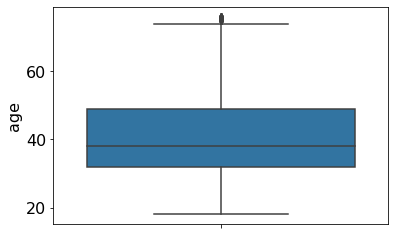

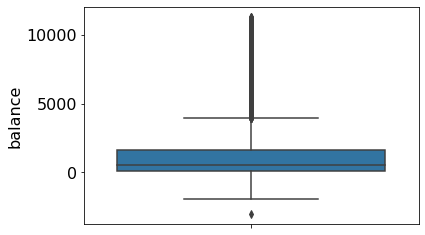

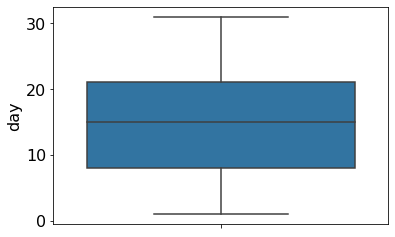

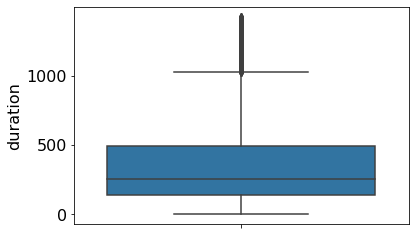

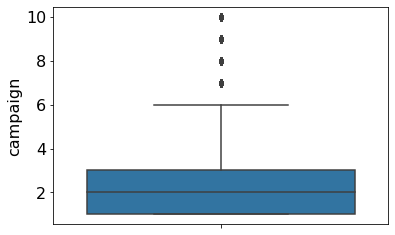

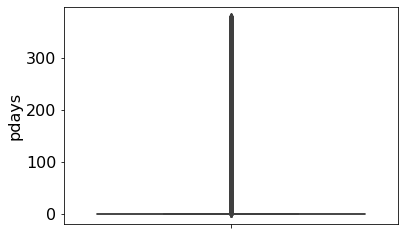

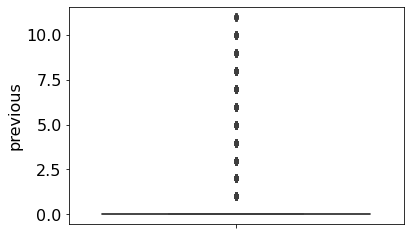

In [116]:
for cols in numerical_columns:
    plt.figure()
    sns.boxplot(y=cleaned_bank_data[cols])
plt.show()

In [ ]:
# sns.countplot(x = 'age', hue = 'y', data=bank_data)

In [32]:
39922/5289, 34463/3852, 34463/38315

(7.548118737001324, 8.946780893042575, 0.8994649615033277)

### Normalizing data


In [118]:
print(bank_sampled.y.value_counts())
cleaned_bank_data.y.value_counts()

no     5289
yes    5289
Name: y, dtype: int64


0    4774
1    4478
Name: y, dtype: int64

In [119]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
Normalized_bank_data = scaler.fit_transform(cleaned_bank_data.iloc[:, :-1])
Normalized_bank_data = pd.DataFrame(Normalized_bank_data, columns=cleaned_bank_data.columns[:-1])
Normalized_bank_data = pd.DataFrame(pd.concat([Normalized_bank_data, cleaned_bank_data.y], axis=1), columns=cleaned_bank_data.columns)
Normalized_bank_data

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,month,y
0,0.344828,0.265381,0.800000,0.372370,0.000000,0.257895,0.090909,0.0,0.5,0.5,0.0,1.0,0.0,0.727273,0
1,0.172414,0.322870,0.200000,0.403927,0.111111,0.000000,0.000000,0.9,1.0,0.5,0.0,0.0,1.0,0.454545,0
2,0.413793,0.473344,0.433333,0.095372,0.000000,0.000000,0.000000,0.1,0.5,0.5,0.0,1.0,0.0,0.727273,0
3,0.500000,0.255498,0.933333,0.034362,0.222222,0.673684,0.181818,0.1,0.5,0.0,0.0,1.0,0.0,0.363636,0
4,0.258621,0.231208,0.533333,0.346424,0.000000,0.000000,0.000000,0.1,1.0,0.5,0.0,1.0,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9247,0.948276,0.411192,0.533333,0.210379,0.000000,0.107895,0.727273,0.5,0.5,0.5,0.0,0.0,0.0,0.818182,1
9248,0.120690,0.247982,0.533333,0.270687,0.111111,0.000000,0.000000,0.9,1.0,0.5,0.0,0.0,1.0,0.818182,1
9249,0.568966,0.270253,0.533333,0.685133,0.222222,0.000000,0.000000,0.9,0.5,1.0,0.0,0.0,0.0,0.818182,1
9250,0.913793,0.333171,0.533333,0.319776,0.111111,0.000000,0.000000,0.5,0.0,0.0,0.0,0.0,0.0,0.818182,1


In [134]:
# Scaled_modified_data.default.unique()

### Checking Correlation using Heatmap

<AxesSubplot:>

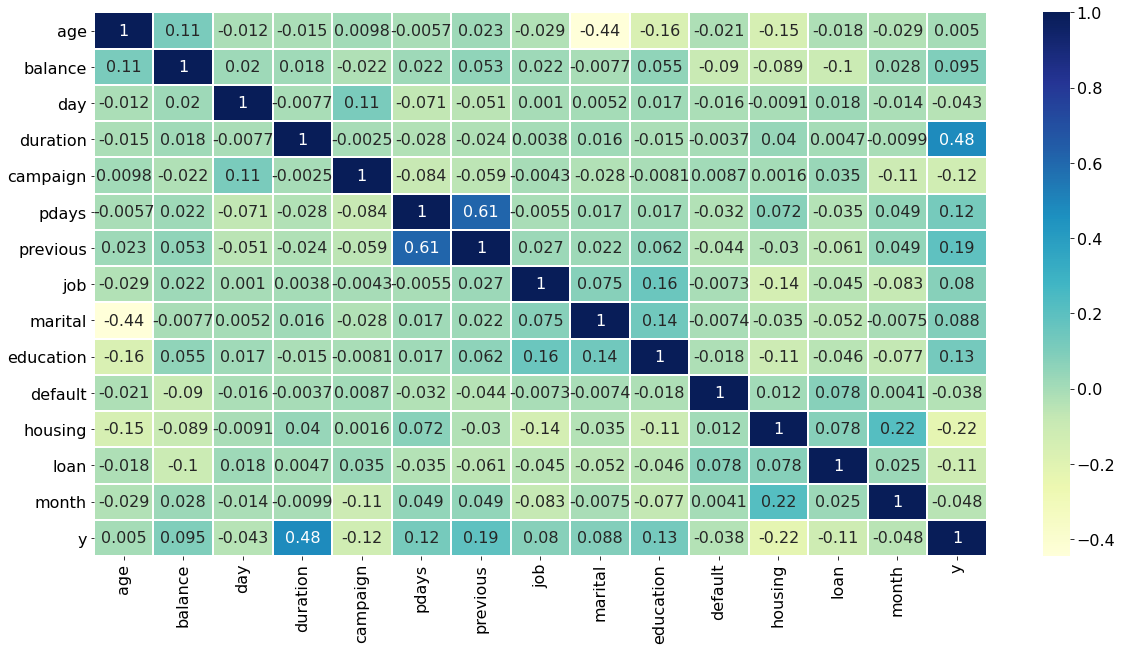

In [120]:
# Plotting it after removing outliers
plt.figure(figsize=[20,10])
sns.heatmap(Normalized_bank_data.corr(),annot=True, linewidths=1, cmap='YlGnBu')

The heatmap above shows the correlation between variables in the dataset. It shows how variables are dependent on each other and by what factor and also their nature of dependency (directly or inversely proportional). By seeing at the heatmap we can see that the top 8 features that affect the quality of wine are `duration`, `housing`, `previous`, `education`, `pdays`, `campaign`, `loan`, `balance`.

In [ ]:
# Normalized_bank_data[Normalized_bank_data.y==0.0]

In [ ]:
# plt.figure(figsize=[20,10])
# sns.heatmap(Normalized_bank_data[Normalized_bank_data.y==1.0].corr(),annot=True, linewidths=1, cmap='YlGnBu')

In [121]:
useful_features = ['duration', 'housing', 'previous', 'education', 'pdays', 'campaign', 'loan', 'balance']

In [122]:
X = Normalized_bank_data.loc[:, useful_features]
Y = Normalized_bank_data.y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.25, random_state=3)
print(X_train.shape, X_test.shape)

(6939, 8) (2313, 8)


In [123]:
for i in range(2,20):
    from sklearn.neighbors import KNeighborsClassifier
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train, y_train)
    print(i, 'Accuracy of our model is', KNN.score(X_test,y_test)*100)

2 Accuracy of our model is 70.68741893644618
3 Accuracy of our model is 75.57284911370515
4 Accuracy of our model is 75.14051015996542
5 Accuracy of our model is 77.64807609165587
6 Accuracy of our model is 78.03718115002162
7 Accuracy of our model is 79.07479463899698
8 Accuracy of our model is 78.33981841763944
9 Accuracy of our model is 79.42066580198876
10 Accuracy of our model is 79.11802853437095
11 Accuracy of our model is 79.11802853437095
12 Accuracy of our model is 78.33981841763944
13 Accuracy of our model is 78.72892347600519
14 Accuracy of our model is 78.64245568525725
15 Accuracy of our model is 79.07479463899698
16 Accuracy of our model is 78.46952010376135
17 Accuracy of our model is 78.68568958063122
18 Accuracy of our model is 78.46952010376135
19 Accuracy of our model is 78.77215737137917


In [124]:
from sklearn.ensemble import RandomForestClassifier as RFC
model = RFC(n_estimators=400)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=400)

In [125]:
model.score(X_test,y_test)

0.7846952010376135

In [126]:
rf_predictions = model.predict(X_test)
rf_probs = model.predict_proba(X_test)[:,1]

In [127]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_value = roc_auc_score(y_test, rf_probs)

In [128]:
roc_value

0.8601186023268618

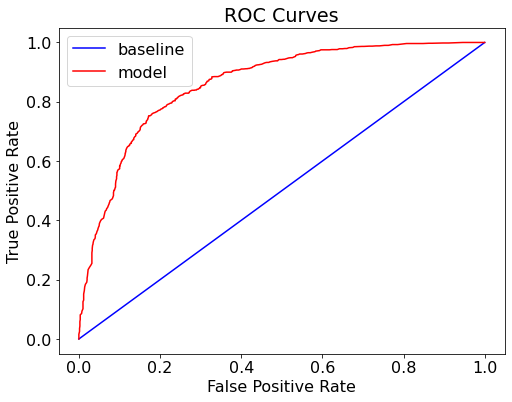

In [129]:
base_fpr, base_tpr, _ = roc_curve(y_test, [0 for _ in range(len(y_test))])
model_fpr, model_tpr, _ = roc_curve(y_test, rf_probs)

plt.figure(figsize = (8, 6))
plt.rcParams['font.size'] = 16

# Plot both curves
plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
plt.plot(model_fpr, model_tpr, 'r', label = 'model')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate'); plt.title('ROC Curves')
plt.show()

In [130]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, rf_predictions)

array([[917, 267],
       [231, 898]], dtype=int64)

In [131]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79      1184
           1       0.77      0.80      0.78      1129

    accuracy                           0.78      2313
   macro avg       0.78      0.78      0.78      2313
weighted avg       0.79      0.78      0.78      2313



In [132]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, rf_predictions)

array([[917, 267],
       [231, 898]], dtype=int64)

In [306]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      9048
           1       0.66      0.33      0.44      1005

    accuracy                           0.92     10053
   macro avg       0.80      0.66      0.70     10053
weighted avg       0.90      0.92      0.90     10053

